<a href="https://colab.research.google.com/github/syedsharin/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/syedsharin/Credit-Card-Default-Prediction/main/default%20of%20credit%20card%20clients.csv")

In [3]:
data.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df = data.drop(0,axis=0).reset_index(drop=True)

In [6]:
# Creating list of column names
columns = ['Limit_bal','Gender','Education','Marital_status','Age','Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May',
           'Repayment_April','Sep_Bill','Aug_Bill','July_Bill','June_Bill','May_Bill','Apr_Bill','Pay_Sep','Pay_Aug','Pay_July','Pay_June','Pay_May','Pay_April','Defaulter']

In [7]:
df.set_axis(columns,axis=1,inplace=True)

In [8]:
df.head()

,Limit_bal,Gender,Education,Marital_status,Age,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.shape

(30000, 24)

In [10]:
df.duplicated().sum()

35

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['Defaulter'].value_counts()    #This shows that the data is imbalance with 6636 defaulters out of 29965

0    23335
1     6630
Name: Defaulter, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Limit_bal            29965 non-null  object
 1   Gender               29965 non-null  object
 2   Education            29965 non-null  object
 3   Marital_status       29965 non-null  object
 4   Age                  29965 non-null  object
 5   Repayment_September  29965 non-null  object
 6   Repayment_August     29965 non-null  object
 7   Repayment_July       29965 non-null  object
 8   Repayment_June       29965 non-null  object
 9   Repayment_May        29965 non-null  object
 10  Repayment_April      29965 non-null  object
 11  Sep_Bill             29965 non-null  object
 12  Aug_Bill             29965 non-null  object
 13  July_Bill            29965 non-null  object
 14  June_Bill            29965 non-null  object
 15  May_Bill             29965 non-null  object
 16  Apr_

In [14]:
# After checking the info() converted all the objectes into int
for i in df.columns:
  df[i]=df[i].astype('int')

In [15]:
df.describe()

,Limit_bal,Gender,Education,Marital_status,Age,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.790411,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [16]:
df.columns

Index(['Limit_bal', 'Gender', 'Education', 'Marital_status', 'Age',
       'Repayment_September', 'Repayment_August', 'Repayment_July',
       'Repayment_June', 'Repayment_May', 'Repayment_April', 'Sep_Bill',
       'Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill', 'Pay_Sep',
       'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April', 'Defaulter'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


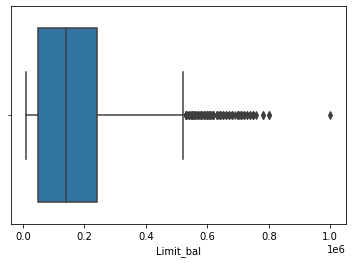

In [17]:
sns.boxplot(df['Limit_bal'])

In [18]:
df[df['Limit_bal']>700000].shape

(23, 24)

In [19]:
df['Limit_bal'] = np.where(df['Limit_bal']>=700000,700000,df['Limit_bal'])

In [20]:
df.Gender.value_counts(normalize=True)

2    0.603738
1    0.396262
Name: Gender, dtype: float64

In [21]:
df['Gender'] = df['Gender'].apply(lambda x:'Male' if x==1 else 'Female')

In [22]:
df.Education.value_counts(normalize=True)

2    0.467846
1    0.352511
3    0.164025
5    0.009344
4    0.004105
6    0.001702
0    0.000467
Name: Education, dtype: float64

In [23]:
df['Education'] = df['Education'].apply(lambda x:'Graduate' if x==1 else ('University' if x==2 else ('High School' if x==3 else 'others')))

In [24]:
df['Marital_status'].value_counts(normalize=True)

2    0.532121
1    0.455298
3    0.010779
0    0.001802
Name: Marital_status, dtype: float64

In [25]:
df['Marital_status'] = df['Marital_status'].apply(lambda x:'Married' if x==1 else('Unmarried' if x==2 else 'others'))

In [26]:
df['Age'].value_counts().sort_index()

21      67
22     560
23     930
24    1126
25    1185
26    1252
27    1475
28    1406
29    1602
30    1394
31    1213
32    1157
33    1146
34    1161
35    1113
36    1107
37    1041
38     943
39     951
40     870
41     822
42     792
43     669
44     700
45     617
46     570
47     501
48     466
49     449
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: Age, dtype: int64

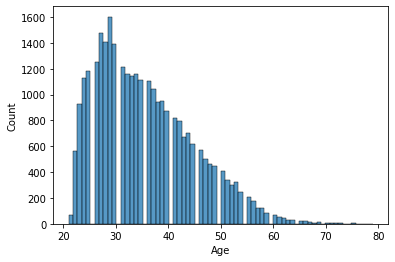

In [27]:
sns.histplot(df['Age'])

In [28]:
df['AgeGroup'] = pd.cut(df.Age, bins=[21,25,30,35,40,45,50,55,60,80],labels=['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61 and Above'])

In [29]:
df[['Age','AgeGroup']].sample(10)

,Age,AgeGroup
18383,22,21-25
5626,51,51-55
13698,31,31-35
14755,64,61 and Above
29246,25,21-25
26864,40,36-40
18520,25,21-25
5550,53,51-55
7194,57,56-60
20884,30,26-30


In [30]:
df.drop(columns=['Age'],inplace=True)